## Assignment 11
## Name : Seyeong Lee
## github : https://github.com/seyeong3131/Assignment11.git

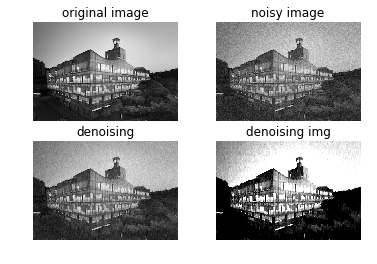

In [10]:
import matplotlib.pyplot as plt
import numpy as np

from scipy import signal
from skimage.restoration import (denoise_tv_chambolle, denoise_bilateral,
                                 denoise_wavelet, estimate_sigma)
from skimage import io, color
from skimage import exposure, data, img_as_float
from skimage.util import random_noise


file_image	= 'cau-1.jpg'

im_color 	= io.imread(file_image)
im_gray  	= color.rgb2gray(im_color)
im          = (im_gray - np.mean(im_gray)) / np.std(im_gray)
(row, col)  = im.shape

noise_std   = 0.2 # try with varying noise standard deviation
noise       = np.random.normal(0, noise_std, (row, col))
im_noise    = im + noise

# obtain the reconstructed (denoised) images with varying degrees of regularization 

im_recon    = im # this must be replaced with the reconstructed (denoised) image 
noise_recon = im_noise - im_recon
error       = np.linalg.norm(im - im_recon)

original = img_as_float(im_noise)

p1 = plt.subplot(2,2,1)
p1.set_title('original image')
plt.imshow(im, cmap='gray')
plt.axis('off')

p2 = plt.subplot(2,2,2)
p2.set_title('noisy image')
plt.imshow(im_noise, cmap='gray')
plt.axis('off')

p3 = plt.subplot(2,2,3)
p3.set_title('denoising')
plt.imshow(denoise_tv_chambolle(original, weight=0.1, multichannel=True), cmap='gray')
plt.axis('off')

p4 = plt.subplot(2,2,4)
p4.set_title('denoising img')
plt.imshow(denoise_wavelet(original, multichannel=True), cmap='gray')
plt.axis('off')

plt.show()